<a href="https://colab.research.google.com/github/Raven-DM/Data-Science/blob/main/Decision_Tree_for_Disease_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

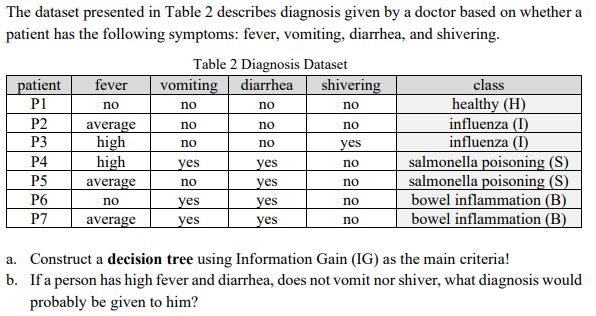

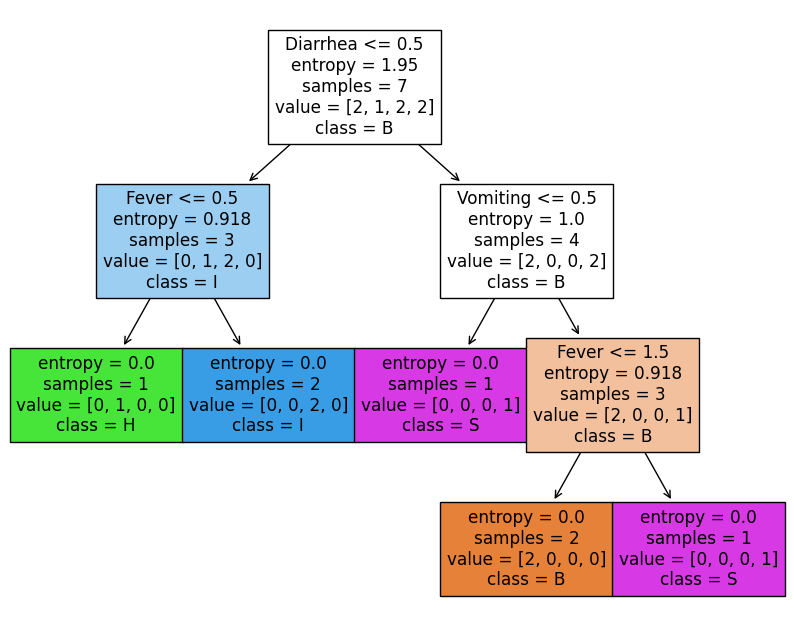

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import preprocessing
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Data
data = {
"Fever": ["0", "0.5", "1", "1", "0.5", "0", "0.5"],
"Vomiting": ["no", "no", "no", "yes", "no", "yes", "yes"],
"Diarrhea": ["no", "no", "no", "yes", "yes", "yes", "yes"],
"Shivering": ["no", "no", "yes", "no", "no", "no", "no"],
"Class": ["H", "I", "I", "S", "S", "B", "B"]
}
df = pd.DataFrame(data)

# Change categorical column into numeric
le = preprocessing.LabelEncoder()
for column in df.columns:
  if df[column].dtype == type(object):
    df[column] = le.fit_transform(df[column])

# Split features and label
X = df.drop(columns=['Class'])
y = df['Class']

# Initialize and train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

# Print tree

plt.figure(figsize=(10, 8))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()

In [ ]:
print (X)

   Fever  Vomiting  Diarrhea  Shivering
0      2         0         0          0
1      0         0         0          0
2      1         0         0          1
3      1         1         1          0
4      0         0         1          0
5      2         1         1          0
6      0         1         1          0


In [ ]:
print(df)

   Fever  Vomiting  Diarrhea  Shivering  Class
0      2         0         0          0      1
1      0         0         0          0      2
2      1         0         0          1      2
3      1         1         1          0      3
4      0         0         1          0      3
5      2         1         1          0      0
6      0         1         1          0      0


In [ ]:
print(y)

0    1
1    2
2    2
3    3
4    3
5    0
6    0
Name: Class, dtype: int64


a) Entropy measures the degree of uncertainty or heterogeneity in a dataset. A higher entropy value indicates that the data is highly heterogeneous (evenly distributed among different classes), whereas a lower entropy value suggests greater homogeneity within a class. Therefore, when constructing a decision tree, it is advisable to use data with a high entropy value for the first node.

As illustrated in the figure below, diarrhea has an entropy value of 1.95, with the largest and most evenly distributed number of samples across disease classes. Consequently, this category serves as the first node or root of the designed decision tree.

Decision Tree Analysis
Numerical label representation and tree direction:

No = 0
Average = 0.5
High = 1
Left branch = true
Right branch = false
The decision tree first considers whether a patient has diarrhea:

If diarrhea is absent (≤ 0.50), the tree subsequently examines fever:
1.1. If fever is absent (≤ 0.5), the patient is classified as class H.
1.2. If fever is present (> 0.5), the patient is classified as class I.
If diarrhea is present (> 0.50), the tree evaluates vomiting:
2.1. If vomiting is absent, the patient is classified as class S.
2.2. If vomiting is present, the tree further assesses fever:
2.2.1. If the patient has no fever or mild fever, they are classified as class B.
2.2.2. If the patient has a high fever, they are classified as class S.
Class Labels:

H = Healthy
I = Influenza
S = Salmonella Poisoning
B = Bowel Inflammation

b)Case Example
If an individual experiences high fever and diarrhea but does not vomit or experience chills, the decision tree indicates that the most probable diagnosis is Salmonella poisoning (S).